# I] Import functions and options

In [ ]:
import pandas, numpy, seaborn
import scipy, scipy.stats
import matplotlib, matplotlib.pyplot as plt
# this is a trick to make figures look nicer
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 
                            'xtick.labelsize':20, 'ytick.labelsize':20, 
                            'axes.grid' : True, 'grid.alpha': 0.5, 'grid.linestyle' : ':',
                            'figure.figsize':(12, 8)})
from matplotlib_venn import venn2

In [ ]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'

In [ ]:
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# II] Data download

In [ ]:
%%time
# DL data ATG7 isoform expression
path = output_file_directory + "ATG7/TCGA_GTEX/all_filtered_tissues/"
path2 = 'dataframes_for_input/'
df_ATG7_Normal = pandas.read_csv(path+path2+'df_ATG7_Normal_filtered.csv', sep = ",")

#remove Survival information
df_ATG7_Normal.drop(df_ATG7_Normal.columns[[3, 4]], axis = 1, inplace = True)

print(df_ATG7_Normal.shape)
df_ATG7_Normal.head(2)

# III] ATG7 expression

## A) ATG7 expression

In [ ]:
#Verification of no values are negative
columns = 'log2_p1_ATG7_total', 'log2_p1_ATG7_1', 'log2_p1_ATG7_2'
for column in columns:
    print(df_ATG7_Normal[column].min())

In [17]:
df_ATG7_Normal.head(1)

,sample,Sample_Type,Primary_Site,ATG7,ATG7_1,ATG7_2,ATG7_3,ATG7_total,ATG7_1tpm,ATG7_2tpm,ATG7_3tpm,log2_p1_ATG7_total,log2_p1_ATG7_1,log2_p1_ATG7_2,ATG7_prot_tot,ATG7_1perc,ATG7_2perc,ATG7_3perc,ATG7_1norm,ATG7_2norm
0,GTEX-132AR-1726-SM-5EGHQ,Normal Tissue,Adrenal Gland,4.496,2.803,1.614,-0.2498,22.563767,6.977902,3.059994,0.840013,4.558498,2.996009,2.021477,10.877908,64.147459,28.130349,7.722192,0.309253,0.135615


4453


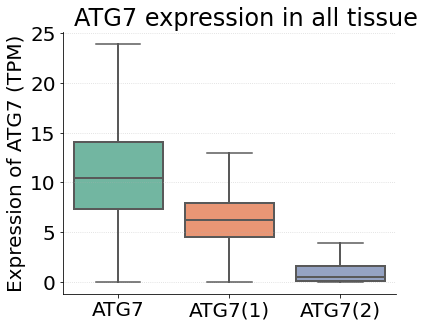

Wall time: 1.37 s


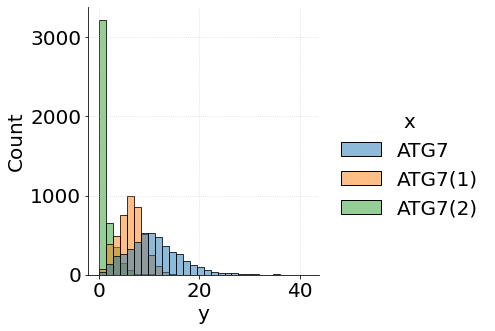

In [112]:
%%time
# Distribution: Data preparation + graph
Data = df_ATG7_Normal
info = 'all tissue'

shape = Data.shape
shape = shape[0]
print(shape)

#select the sample type column
sample_id = {'sample_id':[Data.iloc[:,0][i]
  for i in range(0, shape)]}

#convert to df, and copy it 3 times
sample_id_df = pandas.DataFrame(sample_id)
sample_id_df = pandas.concat([sample_id_df,sample_id_df,sample_id_df])
sample_id_df.reset_index(drop=True, inplace=True)

# Y for expression value 
y = {'y':[Data.iloc[:,j][i]
  for j in range(7,10)
    for i in range(0, shape)]}

#create df with Y 
data_distrib = pandas.DataFrame(y)

# X for ATG7/iso1/iso2                              
data_distrib.loc[:shape,'x'] = 'ATG7'
data_distrib.loc[shape: shape*2,'x'] = 'ATG7(1)'
data_distrib.loc[shape*2:,'x'] = 'ATG7(2)'

# Will be used for control
data_distrib['sample_id'] = sample_id_df['sample_id']

#graph 1
seaborn.catplot(x="x", y="y", aspect= 1.2, kind="box", palette = 'Set2', data = data_distrib, 
              boxprops={'lw':2}, medianprops={'lw':2}, whiskerprops={'lw':2}, showcaps=True, showfliers=False)

plt.ylabel('Expression of ATG7 (TPM)')
plt.xlabel('')
plt.title('ATG7 expression in '+ info, x=.55)
plt.show()
plt.close()

#graph 2
#calcule min and max for binrange
mini = data_distrib['y'].min()
maxi = data_distrib['y'].max()
seaborn.displot(data_distrib, x= "y", hue= "x", bins = 30, binrange = (mini, maxi))

In [92]:
dataa = data_distrib['y']

In [87]:
q1 = dataa.quantile(0.25)
q3 = dataa.quantile(0.75)

7.678376918584329

In [95]:
2 * (q3 - q1)

15.356753837168657

In [125]:
numpy.log2(len(dataa))

13.70552439716406

In [137]:
f'bins = {bin_count}'

'bins = 15.0'

Text(0.5, 1.0, 'bins = {bin_count}')

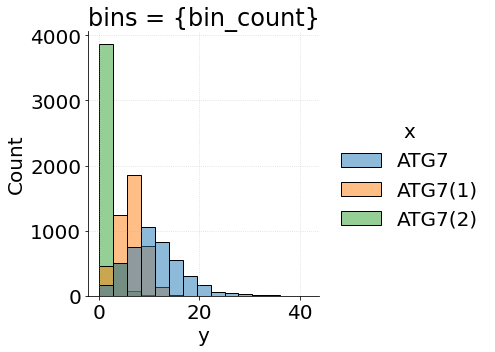

In [138]:
dataa = data_distrib['y']
# Sturge’s rule: size 
bin_count = numpy.ceil((numpy.log2(len(dataa))) +1)

seaborn.displot(data_distrib, x= "y", hue= "x", bins = int(bin_count))
plt.title(f'bins = {bin_count}')

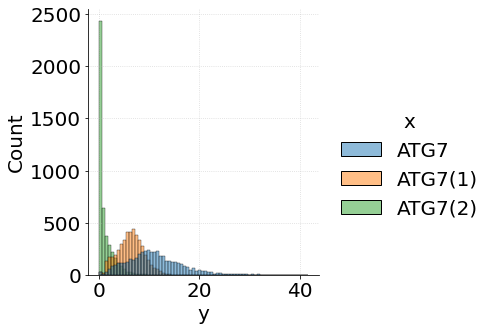

In [121]:
dataa = data_distrib['y']
# Freedman-Diaconis rule: size + spread
bin_width = (2 * (q3 - q1)) / (len(dataa) ** (1 / 3))
bin_count = numpy.ceil((dataa.max() - norm_dist.min()) / bin_width)

seaborn.displot(data_distrib, x= "y", hue= "x", bins = int(bin_count))

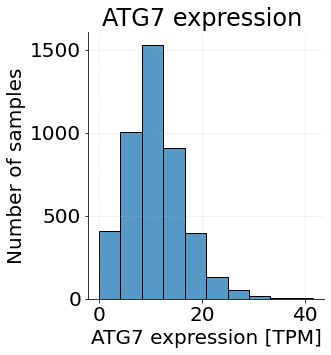

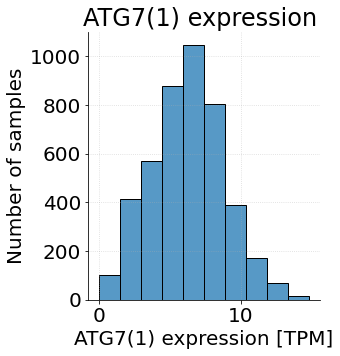

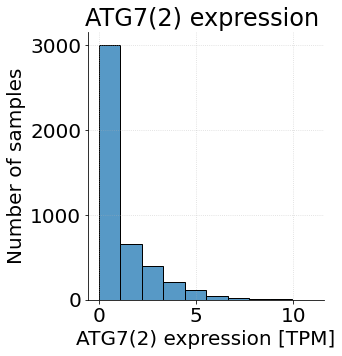

In [76]:
# Distribution graph, for ATG7, iso1 & iso2
## TPM + Count Scale
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'
df_ATG7_Normal
for i in range(len(isoforms)):
    isoform = isoforms[i]
    #calcule min and max for binrange
    mini = df_ATG7_Normal[isoform].min()
    maxi = df_ATG7_Normal[isoform].max()
    
    Data = df_ATG7_Normal[['Sample_Type', isoform]]       
    seaborn.displot(Data, x= isoform, bins = 10, binrange = (mini, maxi))
    
    plt.ylabel('Number of samples')
    plt.xlabel(isoforms_info[i] + ' expression [TPM]')
    plt.title(isoforms_info[i]+ ' expression ')

In [66]:
maxi = df_ATG7_Normal[isoform].max()

In [67]:
print(mini, maxi)

0.0 11.033887374616485


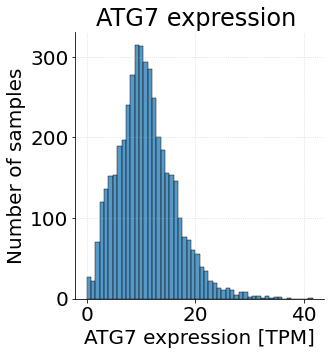

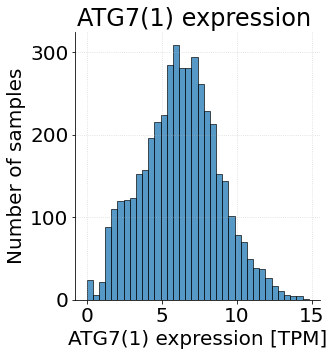

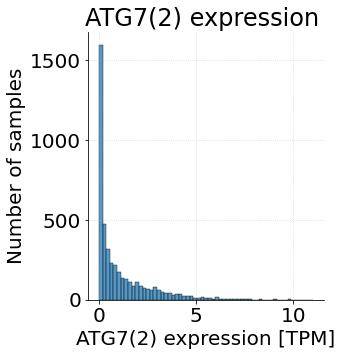

In [27]:
# Distribution graph, for ATG7, iso1 & iso2
## TPM + Count Scale
isoforms = 'ATG7_total', 'ATG7_1tpm', 'ATG7_2tpm'
isoforms_info = 'ATG7', 'ATG7(1)', 'ATG7(2)'
df_ATG7_Normal
for i in range(len(isoforms)):
    isoform = isoforms[i]
    Data = df_ATG7_Normal[['Sample_Type', isoform]]

    seaborn.displot(Data, x= isoform)
    plt.ylabel('Number of samples')
    plt.xlabel(isoforms_info[i] + ' expression [TPM]')
    plt.title(isoforms_info[i]+ ' expression ')
    title_file = 'distrib_' + isoforms_info[i]

In [ ]:
# I don't have the same count ... 1500 vs 2500. Why? which one is correct?

## B) Percentage do not express ATG7 isoforms

In [50]:
#Percentage of patients: 
isoforms = 'ATG7_total','ATG7_1tpm','ATG7_2tpm', 'ATG7_3tpm'

for isoform in isoforms:
       
    what = isoform
    all_ = (df_ATG7_Normal[isoform]).shape
    no_exp = (df_ATG7_Normal[isoform] == 0).sum()
    perc_no_exp = (no_exp*100)/all_
    perc_no_exp = float(perc_no_exp)

    # print("The percentage of patient who do not express", QUOI, OU, "is:", round(perc_no_exp,1),'%')
    print(round(perc_no_exp,1),'%', '(', no_exp, 'samples ) of tissues do not express', what)
print()


0.5 % ( 22 samples ) of tissues do not express ATG7_total
0.5 % ( 22 samples ) of tissues do not express ATG7_1tpm
22.5 % ( 1002 samples ) of tissues do not express ATG7_2tpm
57.8 % ( 2572 samples ) of tissues do not express ATG7_3tpm



In [49]:
#Percentage of patients: 
all_dfs = [[df_ATG7_Normal, 'Normal Tissue']]

isoforms = [['ATG7_total', 'ATG7'], ['ATG7_1tpm', 'ATG7(1)'], 
            ['ATG7_2tpm', 'ATG7(2)']]

df_number_exp = []
what = []
sample_type = []
who_dontexp = []
perc_noexp = []
    
for df in all_dfs:
    for isoform in isoforms:
        #save what isoform
        what.append(isoform[1])
        #save sample_type
        sample_type.append(df[1])
        #have total sample number
        all_ = (df[0][isoform[0]]).shape
        #calculate number of sample who express the isoform
        without_exp = (df[0][isoform[0]]<0.1).sum()
        who_dontexp.append(without_exp)
        #convert result to percentage
        perc_without_exp = float((without_exp*100)/all_)   
        perc_noexp.append(round(perc_without_exp,1))

        #create a dictionnary and convert to dataframe
        d = dict(Isoforms = what, who_dontexp = who_dontexp, 
                 Percentage = perc_noexp, Sample_Type = sample_type)
        df_noexpr_distrib = pandas.DataFrame.from_dict(d, orient='index')
        df_noexpr_distrib = df_noexpr_distrib.T
          
df_noexpr_distrib


,Isoforms,who_dontexp,Percentage,Sample_Type
0,ATG7,22,0.5,Normal Tissue
1,ATG7(1),22,0.5,Normal Tissue
2,ATG7(2),1304,29.3,Normal Tissue


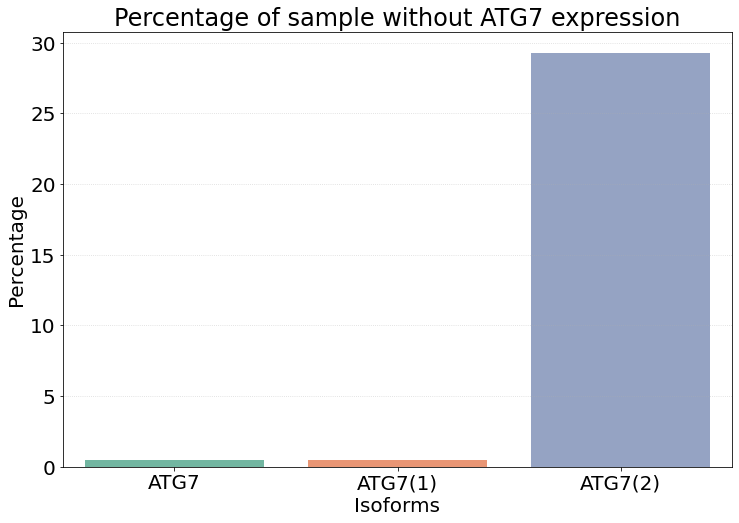

In [30]:
seaborn.barplot(data=df_noexpr_distrib, x="Isoforms", y="Percentage", 
                palette = 'Set2', orient = 'v')
plt.title("Percentage of sample without ATG7 expression")
plt.yticks(fontsize=20)


plt.savefig(path+path2+'percentage_expression.svg')